<a href="https://colab.research.google.com/github/shashank-s99/Cat-Dog-Image-Classifier--Bharat-Intern-/blob/main/cat_dog_BH_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:05<00:00, 244MB/s]
100% 1.06G/1.06G [00:05<00:00, 193MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 105ms/step - loss: 1.4243 - accuracy: 0.5828 - val_loss: 0.6389 - val_accuracy: 0.6066
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6271 - accuracy: 0.6579 - val_loss: 0.6109 - val_accuracy: 0.6800
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5628 - accuracy: 0.7115 - val_loss: 0.6050 - val_accuracy: 0.6924
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4977 - accuracy: 0.7584 - val_loss: 0.5210 - val_accuracy: 0.7280
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4303 - accuracy: 0.7971 - val_loss: 0.4483 - val_accuracy: 0.7828
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3888 - accuracy: 0.8225 - val_loss: 0.4432 - val_accuracy: 0.7950
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3165 - accuracy: 0.8544 - val_loss: 0.4180 - val_ac

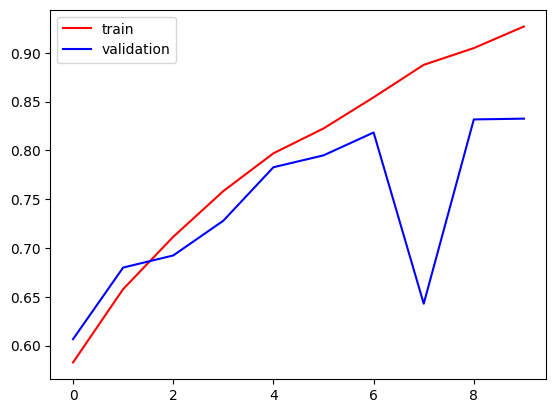

In [ ]:
# graph of training accuracy vs validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

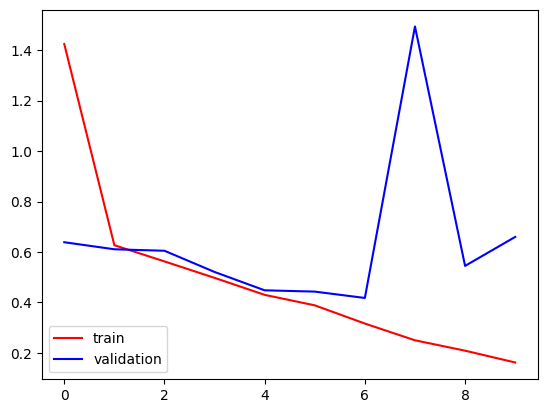

In [ ]:
# validation loss vs training loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

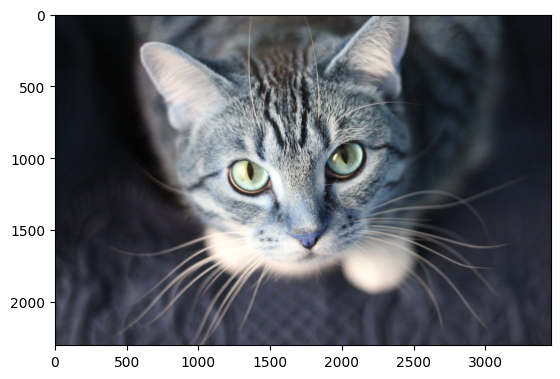

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(2304, 3456, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 227ms/step


array([[0.]], dtype=float32)

Since we got 0 that means our model is working accurately.

In [ ]:
test_img1 = cv2.imread('/content/dogtwo.jpg')

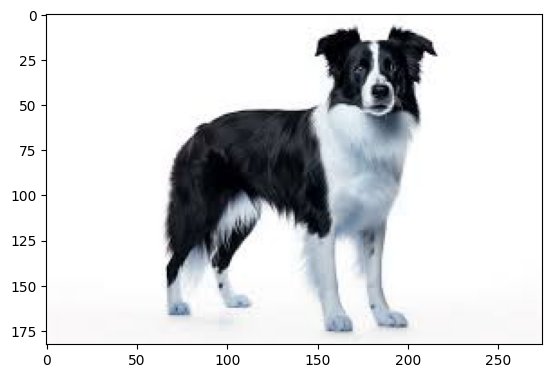

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1.shape

(183, 275, 3)

In [ ]:
test_img1 = cv2.resize(test_img1,(256,256))

In [ ]:
test_input1 = test_img1.reshape((1,256,256,3))

In [ ]:
model.predict(test_input1)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

Hence our model can identify the dog image also showing its accuracy.